# Bike Sharing Assignment

#### Improting the necessary libraries

In [1]:
import pandas as pd

import numpy as np

from math import floor

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#### Loading the data into a dataframe

In [2]:
# reading day.csv into a dataframe
original_dataset = pd.read_csv('day.csv')

In [3]:
bike_share = original_dataset.copy()

In [4]:
print(bike_share.shape)
bike_share.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Understanding the Data

In [5]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Checking the percentage of null values in the dataset

In [7]:
round(100 * (bike_share.isnull().sum() / len(bike_share.index)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### The dataset contains 730 rows and 16 columns. There are no null values present in the dataset.

## Cleaning the Data set

In [8]:
# Viewing the first 5 records of the dataframe
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


From the data dictionary:
- 'instant' is the record index
- 'dteday' is the date, and the information present here is already accounted for
- 'casual' and 'registered' are part of the target variable 'cnt'

In [9]:
# Dropping these variables
bike_share.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Converting 'season', 'mnth', 'weekday' and 'weathersit' to ccategorical variables

In [10]:
bike_share['season'] = bike_share['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

bike_share['mnth'] = bike_share['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
                                             7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})

bike_share['weekday'] = bike_share['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})

bike_share['weathersit'] = bike_share['weathersit'].map({1: 'clear', 2: 'cloudy/misty', 3: 'light rain/snow', 4: 'heavy rain/snow'})

bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy/misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy/misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Performing EDA

<Figure size 1080x1440 with 0 Axes>

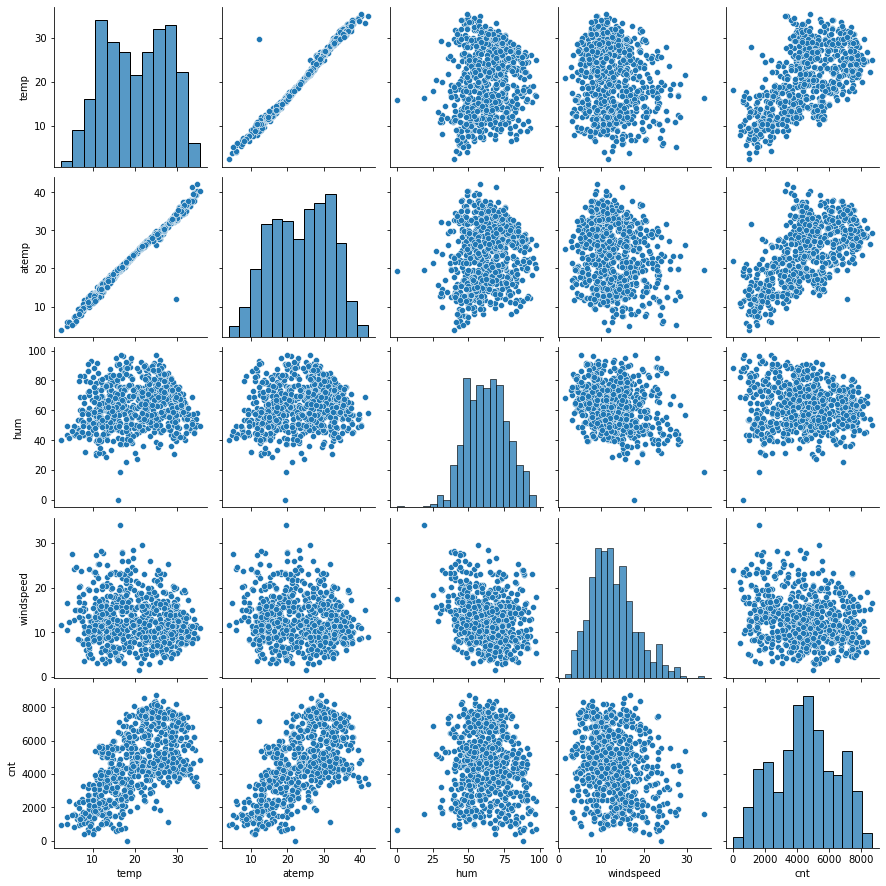

In [11]:
# Creating pairplots for the continuous numeric variables
plt.figure(figsize=(15, 20))
sns.pairplot(bike_share.iloc[:, 7:])
plt.show()

From the pairplot:
- 'temp' and 'atemp' have a high correlation with the target variable 'cnt'
- 'temp' and 'atemp' also have a high correlation with each other

#### Creating a heatmap to understand corrleation between the variables

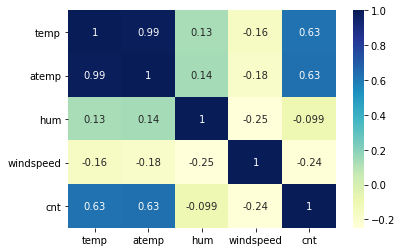

In [12]:
sns.heatmap(bike_share.iloc[:, 7:].corr(), annot=True, cmap='YlGnBu')
plt.show()

`temp` and `atemp` have a correlation of 0.99, which is pretty high.<br/>
Dropping `atemp` to avoid __multicollinearity__

In [13]:
bike_share.drop(['atemp'], axis=1, inplace=True)

#### Creating boxplots for the categorical variables

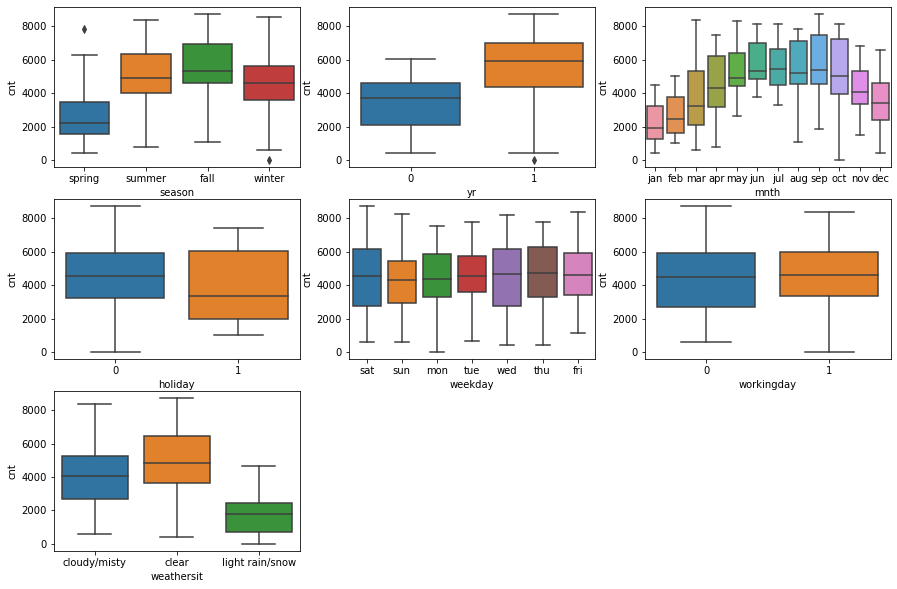

In [14]:
var_list = list(bike_share.iloc[:, :7].columns)
plt.figure(figsize=(15, 10))
for index, var in enumerate(var_list):
    plt.subplot(3, 3, index + 1)
    sns.boxplot(x=var, y='cnt', data=bike_share)
plt.show()

#### From the above plots we can see that:
- Fall is when the average count is the highest
- The count see's a significant rise from 2018 to 2019
- The count see's a general rise till June
    - From June to September the average count becomes steady
    - However come October the average count see's a general decline
- The average count is lowered when there is a holiday
- The weekday and workingday variable show no significant change in the average count
- For weathersit the average count is the highest when the weather is clear

## Data Preparation

#### Creating dummy variables for the categorical variables

In [15]:
# For season
season = pd.get_dummies(bike_share['season'], drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
# For mnth
month = pd.get_dummies(bike_share['mnth'], drop_first=True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [17]:
# For weekday
weekday = pd.get_dummies(bike_share['weekday'], drop_first=True)
weekday.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [18]:
# For weathersit
weather = pd.get_dummies(bike_share['weathersit'], drop_first=True)
weather.head()

,cloudy/misty,light rain/snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [19]:
# Adding the dummy variables into the dataframe
bike_share = pd.concat([bike_share, season, month, weekday, weather], axis=1)
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy/misty,light rain/snow
0,spring,0,jan,0,sat,0,cloudy/misty,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,jan,0,sun,0,cloudy/misty,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Dropping the redundant variables (season, mnth, weekday and weathersit)
bike_share.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
pd.options.display.max_columns = 30
bike_share.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy/misty,light rain/snow
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
bike_share.shape

(730, 29)

## Building the Model

#### Splitting the data into train/test set

In [22]:
df_train, df_test = train_test_split(bike_share, train_size=0.7, random_state=100)
print(f"df_train: {df_train.shape}\ndf_test: {df_test.shape}")

df_train: (510, 29)
df_test: (220, 29)


#### Scaling the features

In [23]:
# Creating an object of MinMaxScaler
scaler = MinMaxScaler()

# Creating a list of numeric variables
num_vars = list(df_train.iloc[:, 3:7].columns)

# Running the MinMaxScaler
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
# Creating X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

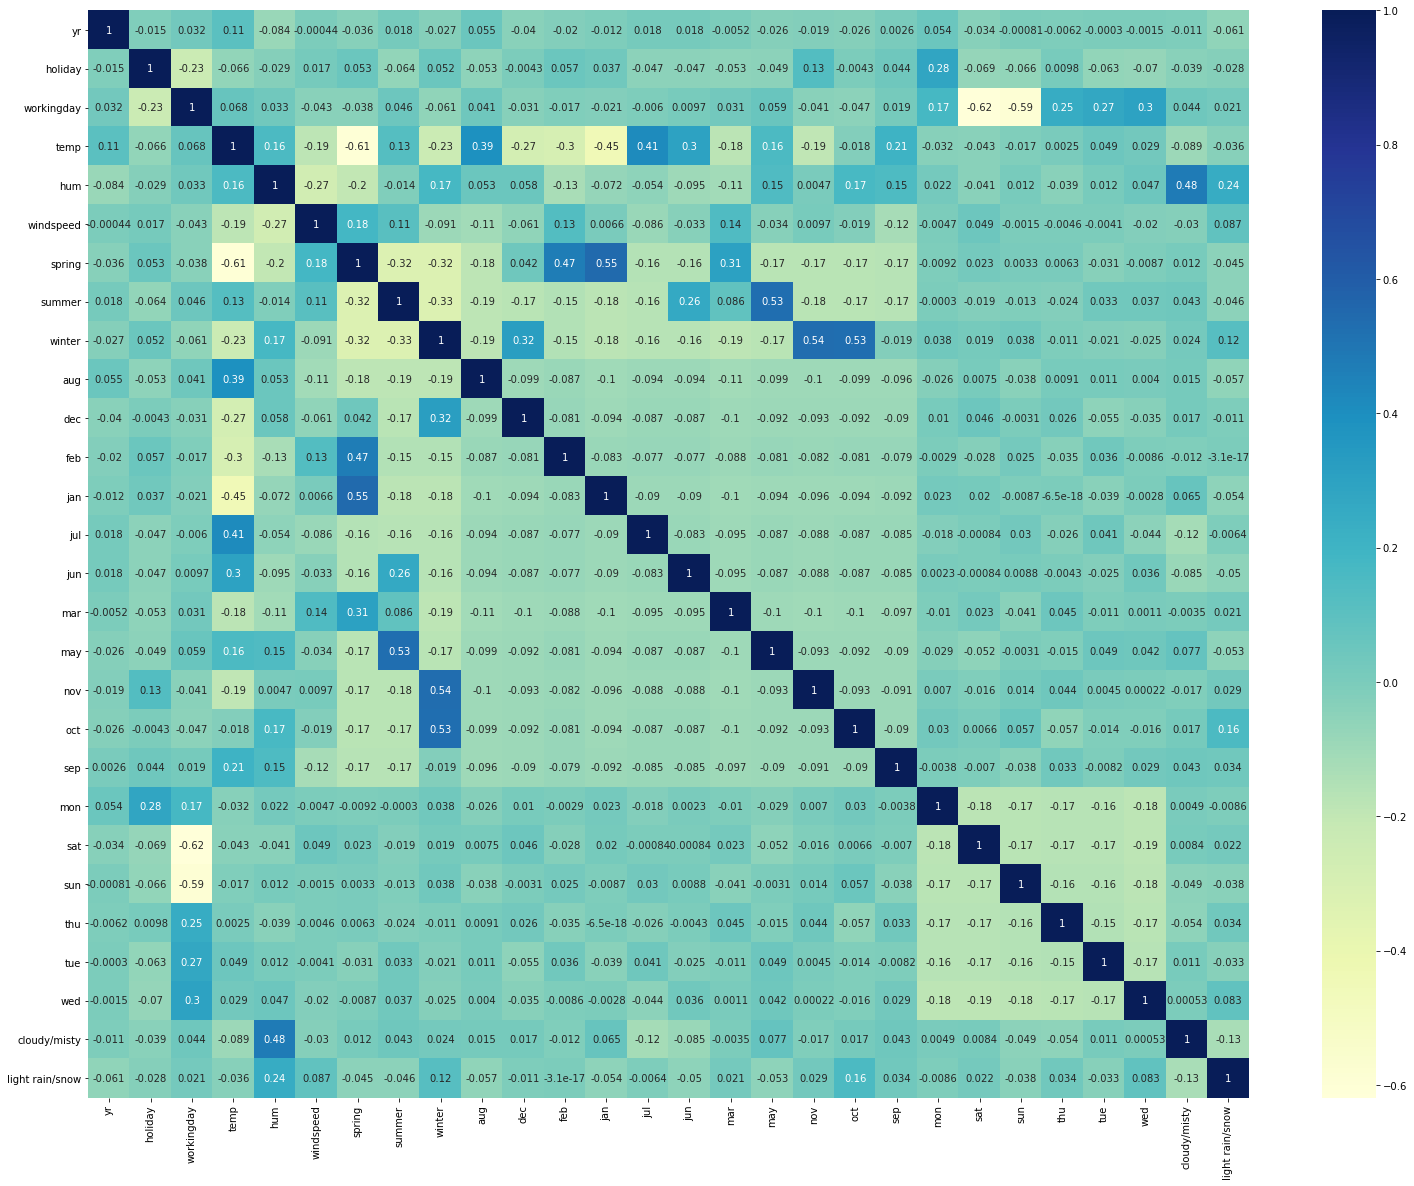

In [25]:
# Plotting the correlation between all the variables in df_train
plt.figure(figsize=(26, 20))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Using RFE to cut down number of features

In [26]:
# Building the model using LinearRegression from sklearn for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

# Selecting 15 features using RFE
rfe = RFE(lr, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [27]:
# Checking the columns selected by RFE and their ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 10),
 ('tue', False, 9),
 ('wed', False, 11),
 ('cloudy/misty', True, 1),
 ('light rain/snow', True, 1)]

In [28]:
# Create a column variable to store the name of the columns
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'cloudy/misty',
       'light rain/snow'],
      dtype='object')

In [29]:
# Viweing the names of the columns which were not selected by RFE
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

In [30]:
# Creating a train set with the variables selected by RFE
X_train_rfe = X_train[cols]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,jan,jul,sep,sat,cloudy/misty,light rain/snow
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


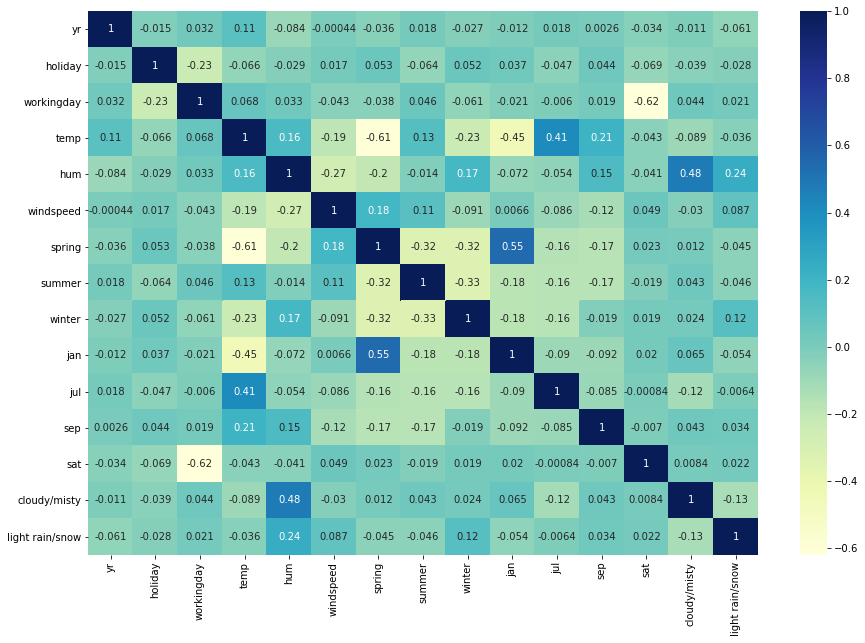

In [31]:
# Checking the correlation of the features selected by RFE
plt.figure(figsize=(15, 10))
sns.heatmap(X_train[cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [32]:
# Creating a function for calculating the VIF
def calculate_vif(df):
    X = df.drop(['const'], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by='VIF', ascending=False)

### Model 1

In [33]:
# Adding a constant to X_train_rfe
X_train_1 = sm.add_constant(X_train_rfe)

# Running the model
lm = sm.OLS(y_train, X_train_1).fit()

# Looking at the summary statistic
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.22e-191
Time:                        15:32:48   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer              0.0508      0.015      3.423      0.001       0.022       0.080
winter              0.0933      0.017      5.403      0.000       0.059       0.127
jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
jul                -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                 0.0814      0.016      4.945      0.000       0.049       0.114
sat                 0.0536      0.014      3.694      0.000       0.025       0.082
cloudy/misty       -0.0563      0.010     -5.439      0.000      -0.077      -0.036
light rain/snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All p-values are less than 0.05. Checking the VIF

In [34]:
calculate_vif(X_train_1)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
13,cloudy/misty,2.29
0,yr,2.09
12,sat,1.98


### Model 2

In [35]:
# Dropping th 'hum' as it has a high VIF
X_train_2 = X_train_1.drop(['hum'], axis=1)

# Running the model
lm = sm.OLS(y_train, X_train_2).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.60e-188
Time:                        15:32:48   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.520      0.000       0.112       0.235
yr                  0.2345      0.008     29.009      0.000       0.219       0.250
holiday            -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday          0.0464      0.012      3.966      0.000       0.023       0.069
temp                0.4722      0.034     14.005      0.000       0.406       0.538
windspeed          -0.1563      0.025     -6.286      0.000      -0.205      -0.107
spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer              0.0445      0.015      2.967      0.003       0.015       0.074
winter              0.0784      0.017      4.562      0.000       0.045       0.112
jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
jul                -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep                 0.0755      0.017      4.527      0.000       0.043       0.108
sat                 0.0583      0.015      3.968      0.000       0.029       0.087
cloudy/misty       -0.0813      0.009     -9.437      0.000      -0.098      -0.064
light rain/snow    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are less than 0.05. Checking VIF

In [36]:
calculate_vif(X_train_2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,yr,2.08
7,winter,1.98
11,sat,1.97
8,jan,1.62
9,jul,1.59


### Model 3

In [37]:
# temp has a high vif value, dropping 'temp'
X_train_3 = X_train_2.drop(['temp'], axis=1)

# Running the model
lm = sm.OLS(y_train, X_train_3).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          6.44e-154
Time:                        15:32:49   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5444      0.020     27.118      0.000       0.505       0.584
yr                  0.2478      0.009     26.153      0.000       0.229       0.266
holiday            -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday          0.0478      0.014      3.466      0.001       0.021       0.075
windspeed          -0.1878      0.029     -6.426      0.000      -0.245      -0.130
spring             -0.2602      0.018    -14.483      0.000      -0.296      -0.225
summer             -0.0427      0.016     -2.651      0.008      -0.074      -0.011
winter             -0.0762      0.016     -4.903      0.000      -0.107      -0.046
jan                -0.1026      0.020     -5.112      0.000      -0.142      -0.063
jul                -0.0095      0.021     -0.446      0.656      -0.052       0.032
sep                 0.0710      0.020      3.610      0.000       0.032       0.110
sat                 0.0562      0.017      3.243      0.001       0.022       0.090
cloudy/misty       -0.0882      0.010     -8.688      0.000      -0.108      -0.068
light rain/snow    -0.3034      0.029    -10.593      0.000      -0.360      -0.247
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After dropping `temp` the accuracy of the model takes a significant hit.<br>This is to be expected as from the scatterplots we can see that `temp` is a good predictor for the count.<br>As such, __temp__ will be added back to model.

### Model 4

In [38]:
# 'jul' has a high p-value
X_train_4 = X_train_3.drop(['jul'], axis=1)

# Running the model
lm = sm.OLS(y_train, X_train_4).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.73e-155
Time:                        15:32:49   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5406      0.018     29.655      0.000       0.505       0.576
yr                  0.2478      0.009     26.179      0.000       0.229       0.266
holiday            -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday          0.0481      0.014      3.489      0.001       0.021       0.075
windspeed          -0.1877      0.029     -6.429      0.000      -0.245      -0.130
spring             -0.2568      0.016    -15.797      0.000      -0.289      -0.225
summer             -0.0393      0.014     -2.768      0.006      -0.067      -0.011
winter             -0.0730      0.014     -5.303      0.000      -0.100      -0.046
jan                -0.1027      0.020     -5.118      0.000      -0.142      -0.063
sep                 0.0737      0.019      3.933      0.000       0.037       0.111
sat                 0.0564      0.017      3.254      0.001       0.022       0.090
cloudy/misty       -0.0879      0.010     -8.685      0.000      -0.108      -0.068
light rain/snow    -0.3035      0.029    -10.606      0.000      -0.360      -0.247
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5

In [39]:
# 'holiday' has a high p-value
X_train_5 = X_train_4.drop(['holiday'], axis=1)

# Running the model
lm = sm.OLS(y_train, X_train_5).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.01e-155
Time:                        15:32:49   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5332      0.018     30.023      0.000       0.498       0.568
yr                  0.2480      0.009     26.146      0.000       0.229       0.267
workingday          0.0564      0.013      4.353      0.000       0.031       0.082
windspeed          -0.1887      0.029     -6.450      0.000      -0.246      -0.131
spring             -0.2581      0.016    -15.860      0.000      -0.290      -0.226
summer             -0.0394      0.014     -2.768      0.006      -0.067      -0.011
winter             -0.0743      0.014     -5.392      0.000      -0.101      -0.047
jan                -0.1033      0.020     -5.138      0.000      -0.143      -0.064
sep                 0.0715      0.019      3.815      0.000       0.035       0.108
sat                 0.0648      0.017      3.887      0.000       0.032       0.098
cloudy/misty       -0.0874      0.010     -8.623      0.000      -0.107      -0.067
light rain/snow    -0.3023      0.029    -10.546      0.000      -0.359      -0.246
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are less than 0.05, checking the VIF values

In [40]:
calculate_vif(X_train_5)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,2.00
0,yr,1.88
5,winter,1.73
6,jan,1.60
9,cloudy/misty,1.57
8,sat,1.56
7,sep,1.18


#### The VIF values for all the variables are less than '5' which is acceptable

### Model 6

In [41]:
# reintroducing 'temp' and rebuilding the model
X_train_6 = X_train_1[list(X_train_5.columns) + ['temp']]

# Running the model
lm = sm.OLS(y_train, X_train_6).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.44e-188
Time:                        15:32:49   Log-Likelihood:                 505.29
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     497   BIC:                            -929.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1582      0.031      5.046      0.000       0.097       0.220
yr                  0.2352      0.008     28.855      0.000       0.219       0.251
workingday          0.0555      0.011      5.025      0.000       0.034       0.077
windspeed          -0.1576      0.025     -6.288      0.000      -0.207      -0.108
spring             -0.0498      0.021     -2.416      0.016      -0.090      -0.009
summer              0.0587      0.014      4.157      0.000       0.031       0.086
winter              0.0887      0.017      5.299      0.000       0.056       0.122
jan                -0.0417      0.018     -2.351      0.019      -0.077      -0.007
sep                 0.0863      0.016      5.385      0.000       0.055       0.118
sat                 0.0670      0.014      4.707      0.000       0.039       0.095
cloudy/misty       -0.0795      0.009     -9.170      0.000      -0.097      -0.062
light rain/snow    -0.2906      0.024    -11.870      0.000      -0.339      -0.243
temp                0.4595      0.034     13.664      0.000       0.393       0.526
==============================================================================
Omnibus:                       77.306   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.164
Skew:                          -0.776   Prob(JB):                     3.08e-42
Kurtosis:                       5.566   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are less than 0.05, checking the VIF values

In [42]:
calculate_vif(X_train_6)

,Features,VIF
11,temp,5.53
1,workingday,4.68
2,windspeed,4.65
3,spring,2.87
0,yr,2.07
4,summer,2.00
8,sat,1.84
5,winter,1.76
6,jan,1.61
9,cloudy/misty,1.58


### Model 7

In [43]:
# Dropping 'workingday' and rebuilding the model
X_train_7 = X_train_6.drop(['workingday'], axis=1)

# Runnig the model
lm = sm.OLS(y_train, X_train_7).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.00e-184
Time:                        15:32:49   Log-Likelihood:                 492.65
No. Observations:                 510   AIC:                            -961.3
Df Residuals:                     498   BIC:                            -910.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2027      0.031      6.580      0.000       0.142       0.263
yr                  0.2357      0.008     28.246      0.000       0.219       0.252
windspeed          -0.1596      0.026     -6.218      0.000      -0.210      -0.109
spring             -0.0521      0.021     -2.467      0.014      -0.094      -0.011
summer              0.0587      0.014      4.065      0.000       0.030       0.087
winter              0.0847      0.017      4.946      0.000       0.051       0.118
jan                -0.0415      0.018     -2.283      0.023      -0.077      -0.006
sep                 0.0864      0.016      5.263      0.000       0.054       0.119
sat                 0.0227      0.011      1.981      0.048       0.000       0.045
cloudy/misty       -0.0764      0.009     -8.624      0.000      -0.094      -0.059
light rain/snow    -0.2829      0.025    -11.307      0.000      -0.332      -0.234
temp                0.4604      0.034     13.370      0.000       0.393       0.528
==============================================================================
Omnibus:                       81.548   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.920
Skew:                          -0.839   Prob(JB):                     9.48e-42
Kurtosis:                       5.464   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are less than 0.05, checking the VIF values

In [44]:
calculate_vif(X_train_7)

,Features,VIF
1,windspeed,4.63
10,temp,3.89
2,spring,2.63
0,yr,2.07
3,summer,1.91
4,winter,1.63
5,jan,1.60
8,cloudy/misty,1.56
6,sep,1.22
7,sat,1.19


### Model 8

In [45]:
# Adding 'sun' in and rebuilding the model
X_train_8 = sm.add_constant(X_train[list(X_train_7.iloc[:, 1:].columns) + ['sun']])

# Running the model
lm = sm.OLS(y_train, X_train_8).fit()

# Looking at the summary statistic
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.04e-186
Time:                        15:32:49   Log-Likelihood:                 499.48
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -917.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2104      0.030      6.901      0.000       0.151       0.270
yr                  0.2355      0.008     28.568      0.000       0.219       0.252
windspeed          -0.1590      0.025     -6.272      0.000      -0.209      -0.109
spring             -0.0514      0.021     -2.466      0.014      -0.092      -0.010
summer              0.0587      0.014      4.113      0.000       0.031       0.087
winter              0.0865      0.017      5.113      0.000       0.053       0.120
jan                -0.0420      0.018     -2.342      0.020      -0.077      -0.007
sep                 0.0846      0.016      5.218      0.000       0.053       0.116
sat                 0.0152      0.011      1.329      0.185      -0.007       0.038
cloudy/misty       -0.0781      0.009     -8.915      0.000      -0.095      -0.061
light rain/snow    -0.2871      0.025    -11.606      0.000      -0.336      -0.239
temp                0.4601      0.034     13.529      0.000       0.393       0.527
sun                -0.0436      0.012     -3.673      0.000      -0.067      -0.020
==============================================================================
Omnibus:                       85.574   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.816
Skew:                          -0.843   Prob(JB):                     3.05e-48
Kurtosis:                       5.730   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 9

In [46]:
# Dropping 'sat' and rebuilding the model
X_train_9 = X_train_8.drop(['sat'], axis=1)

# Running the model
lm = sm.OLS(y_train, X_train_9).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          6.26e-187
Time:                        15:32:49   Log-Likelihood:                 498.58
No. Observations:                 510   AIC:                            -973.2
Df Residuals:                     498   BIC:                            -922.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2134      0.030      7.013      0.000       0.154       0.273
yr                  0.2351      0.008     28.519      0.000       0.219       0.251
windspeed          -0.1575      0.025     -6.213      0.000      -0.207      -0.108
spring             -0.0517      0.021     -2.476      0.014      -0.093      -0.011
summer              0.0584      0.014      4.088      0.000       0.030       0.086
winter              0.0866      0.017      5.114      0.000       0.053       0.120
jan                -0.0418      0.018     -2.331      0.020      -0.077      -0.007
sep                 0.0845      0.016      5.205      0.000       0.053       0.116
cloudy/misty       -0.0781      0.009     -8.909      0.000      -0.095      -0.061
light rain/snow    -0.2870      0.025    -11.590      0.000      -0.336      -0.238
temp                0.4593      0.034     13.496      0.000       0.392       0.526
sun                -0.0464      0.012     -3.965      0.000      -0.069      -0.023
==============================================================================
Omnibus:                       80.955   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.003
Skew:                          -0.788   Prob(JB):                     3.39e-47
Kurtosis:                       5.754   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are less than 0.05, checking the VIF values

In [47]:
calculate_vif(X_train_9)

,Features,VIF
1,windspeed,4.61
9,temp,3.92
2,spring,2.64
0,yr,2.07
3,summer,1.91
4,winter,1.64
5,jan,1.60
7,cloudy/misty,1.56
6,sep,1.22
10,sun,1.17


###  Model 10

In [48]:
# Dorpping 'jan' and rebuilding the model, as spring and jan have a high correlation
X_train_10 = X_train_9.drop(['jan'], axis=1)

# Running the model
lm = sm.OLS(y_train, X_train_10).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.70e-187
Time:                        15:32:49   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1956      0.030      6.611      0.000       0.137       0.254
yr                  0.2344      0.008     28.324      0.000       0.218       0.251
windspeed          -0.1498      0.025     -5.935      0.000      -0.199      -0.100
spring             -0.0572      0.021     -2.749      0.006      -0.098      -0.016
summer              0.0623      0.014      4.377      0.000       0.034       0.090
winter              0.0937      0.017      5.599      0.000       0.061       0.127
sep                 0.0854      0.016      5.244      0.000       0.053       0.117
cloudy/misty       -0.0790      0.009     -8.981      0.000      -0.096      -0.062
light rain/snow    -0.2856      0.025    -11.487      0.000      -0.334      -0.237
temp                0.4795      0.033     14.503      0.000       0.415       0.544
sun                -0.0461      0.012     -3.925      0.000      -0.069      -0.023
==============================================================================
Omnibus:                       79.321   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.654
Skew:                          -0.775   Prob(JB):                     4.91e-46
Kurtosis:                       5.724   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are less than 0.05, checking the VIF values

In [49]:
calculate_vif(X_train_10)

,Features,VIF
1,windspeed,4.59
8,temp,3.90
0,yr,2.07
2,spring,2.00
3,summer,1.91
4,winter,1.64
6,cloudy/misty,1.55
5,sep,1.22
9,sun,1.17
7,light rain/snow,1.08


### Model 11

In [50]:
# Dropping windspeed and rebuilding the model
X_train_11 = X_train_10.drop(['windspeed'], axis=1)

# Running the model
lm = sm.OLS(y_train, X_train_11).fit()

# Looking at the summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          8.07e-181
Time:                        15:32:49   Log-Likelihood:                 478.42
No. Observations:                 510   AIC:                            -936.8
Df Residuals:                     500   BIC:                            -894.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1455      0.029      4.964      0.000       0.088       0.203
yr                  0.2334      0.009     27.294      0.000       0.217       0.250
spring             -0.0668      0.021     -3.113      0.002      -0.109      -0.025
summer              0.0525      0.015      3.588      0.000       0.024       0.081
winter              0.0949      0.017      5.483      0.000       0.061       0.129
sep                 0.0898      0.017      5.337      0.000       0.057       0.123
cloudy/misty       -0.0772      0.009     -8.496      0.000      -0.095      -0.059
light rain/snow    -0.3004      0.026    -11.749      0.000      -0.351      -0.250
temp                0.4915      0.034     14.410      0.000       0.424       0.559
sun                -0.0461      0.012     -3.794      0.000      -0.070      -0.022
==============================================================================
Omnibus:                       78.188   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.744
Skew:                          -0.762   Prob(JB):                     1.28e-45
Kurtosis:                       5.721   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are less than 0.05, checking the VIF values

In [51]:
calculate_vif(X_train_11)

,Features,VIF
7,temp,2.97
0,yr,2.06
2,summer,1.64
5,cloudy/misty,1.55
3,winter,1.44
1,spring,1.33
4,sep,1.22
8,sun,1.17
6,light rain/snow,1.07


#### For Model 11:
    - The VIF for all the variables seems to be acceptable.
    - The p-value for all the variables are almost 0
    - The R-sqaured value of the model is 0.822
    
__Selecting Model 11 as the final model.__

### FINAL MODEL

In [52]:
X_train_final = X_train_11.copy()

# Running the final model
final_model = sm.OLS(y_train, X_train_final).fit()

# Looking at the summary statistics
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          8.07e-181
Time:                        15:32:49   Log-Likelihood:                 478.42
No. Observations:                 510   AIC:                            -936.8
Df Residuals:                     500   BIC:                            -894.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1455      0.029      4.964      0.000       0.088       0.203
yr                  0.2334      0.009     27.294      0.000       0.217       0.250
spring             -0.0668      0.021     -3.113      0.002      -0.109      -0.025
summer              0.0525      0.015      3.588      0.000       0.024       0.081
winter              0.0949      0.017      5.483      0.000       0.061       0.129
sep                 0.0898      0.017      5.337      0.000       0.057       0.123
cloudy/misty       -0.0772      0.009     -8.496      0.000      -0.095      -0.059
light rain/snow    -0.3004      0.026    -11.749      0.000      -0.351      -0.250
temp                0.4915      0.034     14.410      0.000       0.424       0.559
sun                -0.0461      0.012     -3.794      0.000      -0.070      -0.022
==============================================================================
Omnibus:                       78.188   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.744
Skew:                          -0.762   Prob(JB):                     1.28e-45
Kurtosis:                       5.721   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluating the Model

#### Residual Analysis

In [53]:
y_train_pred = final_model.predict(X_train_final)

In [54]:
res = y_train - y_train_pred

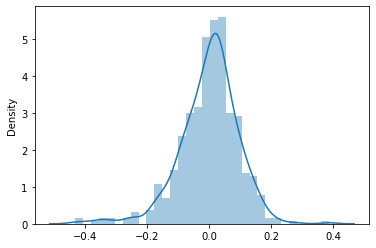

In [55]:
# Creating a histogram of the error terms
sns.distplot(res)
plt.show()

#### Error's seem to be normally distributed, with mean 0.

### Evaluating the final model on the test data

In [56]:
# Scalling the features in the df_test
# Using .transform() as test data can only be transformed
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [57]:
# Creating X_test and y_test
y_test = df_test.pop('cnt')
# Adding a constant to X_test
X_test = sm.add_constant(df_test)

In [58]:
# Selecting the features that the model requires
X_test = X_test[list(X_train_final.columns)]

In [59]:
# Predicting y_test values
y_test_pred = final_model.predict(X_test)

#### Plotting the error terms for y_test and y_test_pred

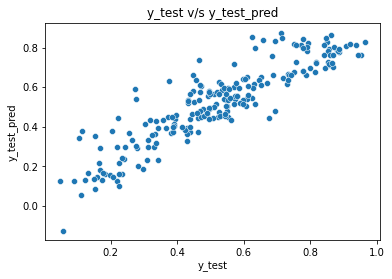

In [60]:
sns.scatterplot(y_test, y_test_pred)
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

#### R-squared value for the predictions on the test set

In [61]:
r2_score(y_test, y_test_pred)

0.8086228724139657

We can see that the equation of the best fitted line is:

$count = 0.1455 \times year - 0.0668 \times spring + 0.0525 \times summer + 0.0949 \times winter + 0.0898 \times september - 0.0772 \times cloudy/misty\_weather - 0.3004 \times light\_rain/snow + 0.4915 \times temp - 0.0461 \times sunday$